# Airbnb Inc. operates as a global online marketplace that facilitates lodging and tourism experiences, with a customer base of nearly 150 million. Given the highly competitive nature of the market, pricing strategies play a crucial role in attracting and retaining customers. To avoid losing customers to competitors, strategically pricing properties listed on the platform is imperative.We have a dataset containing information on 74,111 Airbnb properties from various nations. The goal is to develop predictive models to forecast the optimal pricing for newly listed properties accurately. By leveraging simple and multiple linear regression techniques, we aim to create models considering various property attributes to recommend competitive and strategic pricing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
import os

In [3]:
os.getcwd()

'/Users/sharageorgevaidian'

In [4]:
os.chdir('/Users/sharageorgevaidian/Downloads')

In [5]:
df=pd.read_csv("AirBNB-1.csv")

/var/folders/zz/zpk8djbj3kd1rv8r74fd75kc0000gn/T/ipykernel_54171/677021060.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("AirBNB-1.csv")


In [6]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


## EDA

In [7]:
df = df.drop('id', axis=1)

In [8]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [9]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [12]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [13]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [14]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
cleaning_fee            4
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [15]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [16]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 19994


In [17]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 10)
After (54117, 10)


In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [22]:
corr=df.corr()
corr

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
accommodates,1.000000,0.488909,0.033660,0.710318,0.798588,0.557904
bathrooms,0.488909,1.000000,0.046463,0.587938,0.506521,0.358850
review_scores_rating,0.033660,0.046463,1.000000,0.044505,0.022899,0.115685
bedrooms,0.710318,0.587938,0.044505,1.000000,0.706424,0.488122
beds,0.798588,0.506521,0.022899,0.706424,1.000000,0.431584
log_price,0.557904,0.358850,0.115685,0.488122,0.431584,1.000000


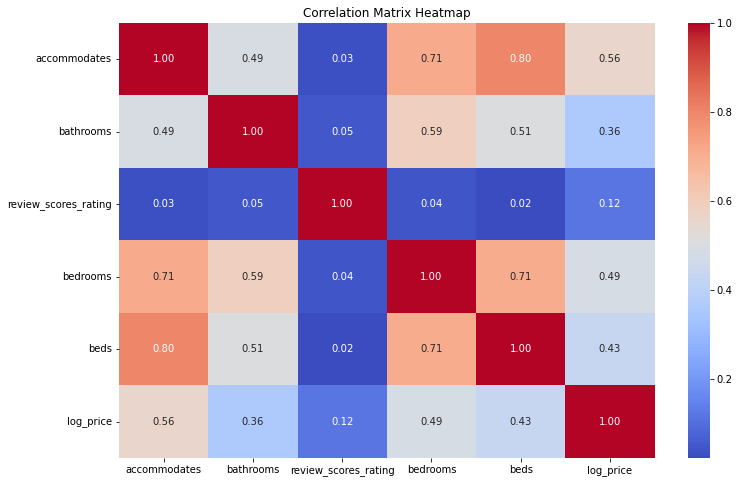

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

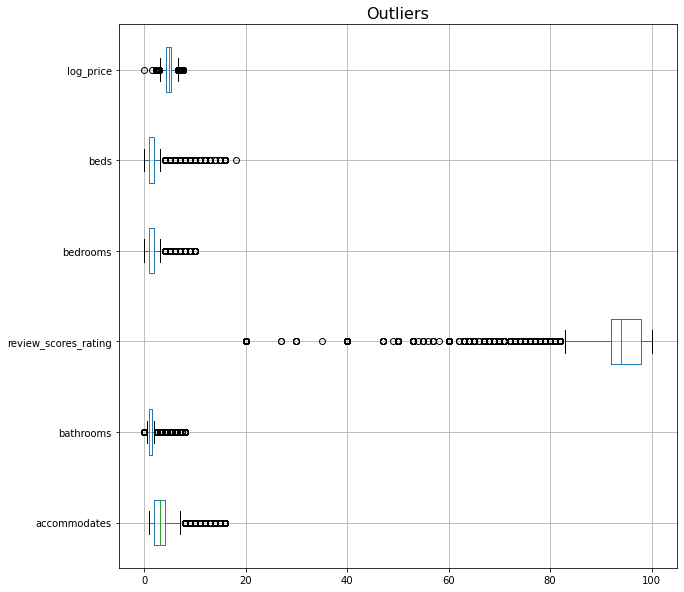

In [24]:
cont=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

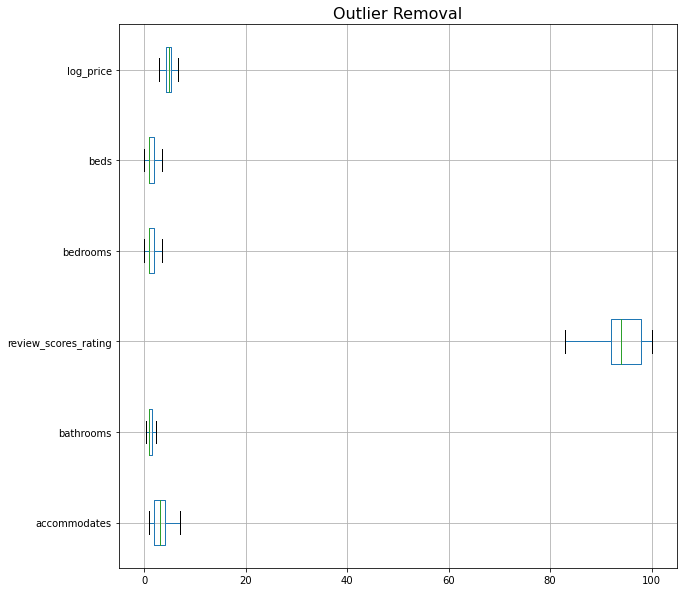

In [27]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('Outlier Removal',fontsize=16)
plt.show()

### Regression Models

In [28]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [29]:
target = 'log_price'
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds',]

In [30]:
X = df[features]
y = df[target]

In [31]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [32]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
        Feature       VIF
0  accommodates  3.335609
1     bathrooms  1.455665
2      bedrooms  2.440268
3          beds  3.356102


In [33]:
X_final = X_scaled

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

### Building Models

Simple Linear Regression

In [38]:
if X_train.shape[1] > 0:
    simple_lr = LinearRegression()
    simple_lr.fit(X_train.iloc[:, [0]], y_train)
    y_pred_simple_lr = simple_lr.predict(X_test.iloc[:, [0]])

Multiple Linear Regression

In [39]:
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)
y_pred_multiple_lr = multiple_lr.predict(X_test)

Lasso Regression

In [40]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

Ridge Regression

In [41]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [42]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}')
    return mae, mse, rmse, r2

In [43]:
evaluate_model(y_test, y_pred_simple_lr, 'Simple Linear Regression')


evaluate_model(y_test, y_pred_multiple_lr, 'Multiple Linear Regression')


evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')


evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')


Simple Linear Regression - MAE: 0.46, MSE: 0.35, RMSE: 0.59, R2: 0.34
Multiple Linear Regression - MAE: 0.46, MSE: 0.34, RMSE: 0.59, R2: 0.35
Lasso Regression - MAE: 0.47, MSE: 0.36, RMSE: 0.60, R2: 0.33
Ridge Regression - MAE: 0.46, MSE: 0.34, RMSE: 0.59, R2: 0.35


(0.4572010759088769,
 0.34380372940655335,
 0.5863477887794524,
 0.35489626765415816)

In [44]:
results = {
    'Multiple Linear Regression': evaluate_model(y_test, y_pred_multiple_lr, 'Multiple Linear Regression'),
    'Lasso Regression': evaluate_model(y_test, y_pred_lasso, 'Lasso Regression'),
    'Ridge Regression': evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
}

if X_train.shape[1] > 1:
    results['Simple Linear Regression'] = evaluate_model(y_test, y_pred_simple_lr, 'Simple Linear Regression')

best_model = min(results, key=lambda k: results[k][2])  # Choose based on RMSE
print(f'The best model is: {best_model}')

Multiple Linear Regression - MAE: 0.46, MSE: 0.34, RMSE: 0.59, R2: 0.35
Lasso Regression - MAE: 0.47, MSE: 0.36, RMSE: 0.60, R2: 0.33
Ridge Regression - MAE: 0.46, MSE: 0.34, RMSE: 0.59, R2: 0.35
Simple Linear Regression - MAE: 0.46, MSE: 0.35, RMSE: 0.59, R2: 0.34
The best model is: Multiple Linear Regression
